In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [3]:
df=pd.read_excel('CVD.xlsx')

# PRELIMINARY ANALYSIS

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.shape

(303, 14)

# Missing value treatment

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Statistical summary

In [7]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Univariate Analysis

In [11]:
numcol=['age','trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
catcol=[col for col in df.columns if col  not in numcol]
catcol

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Exploring categorical variables

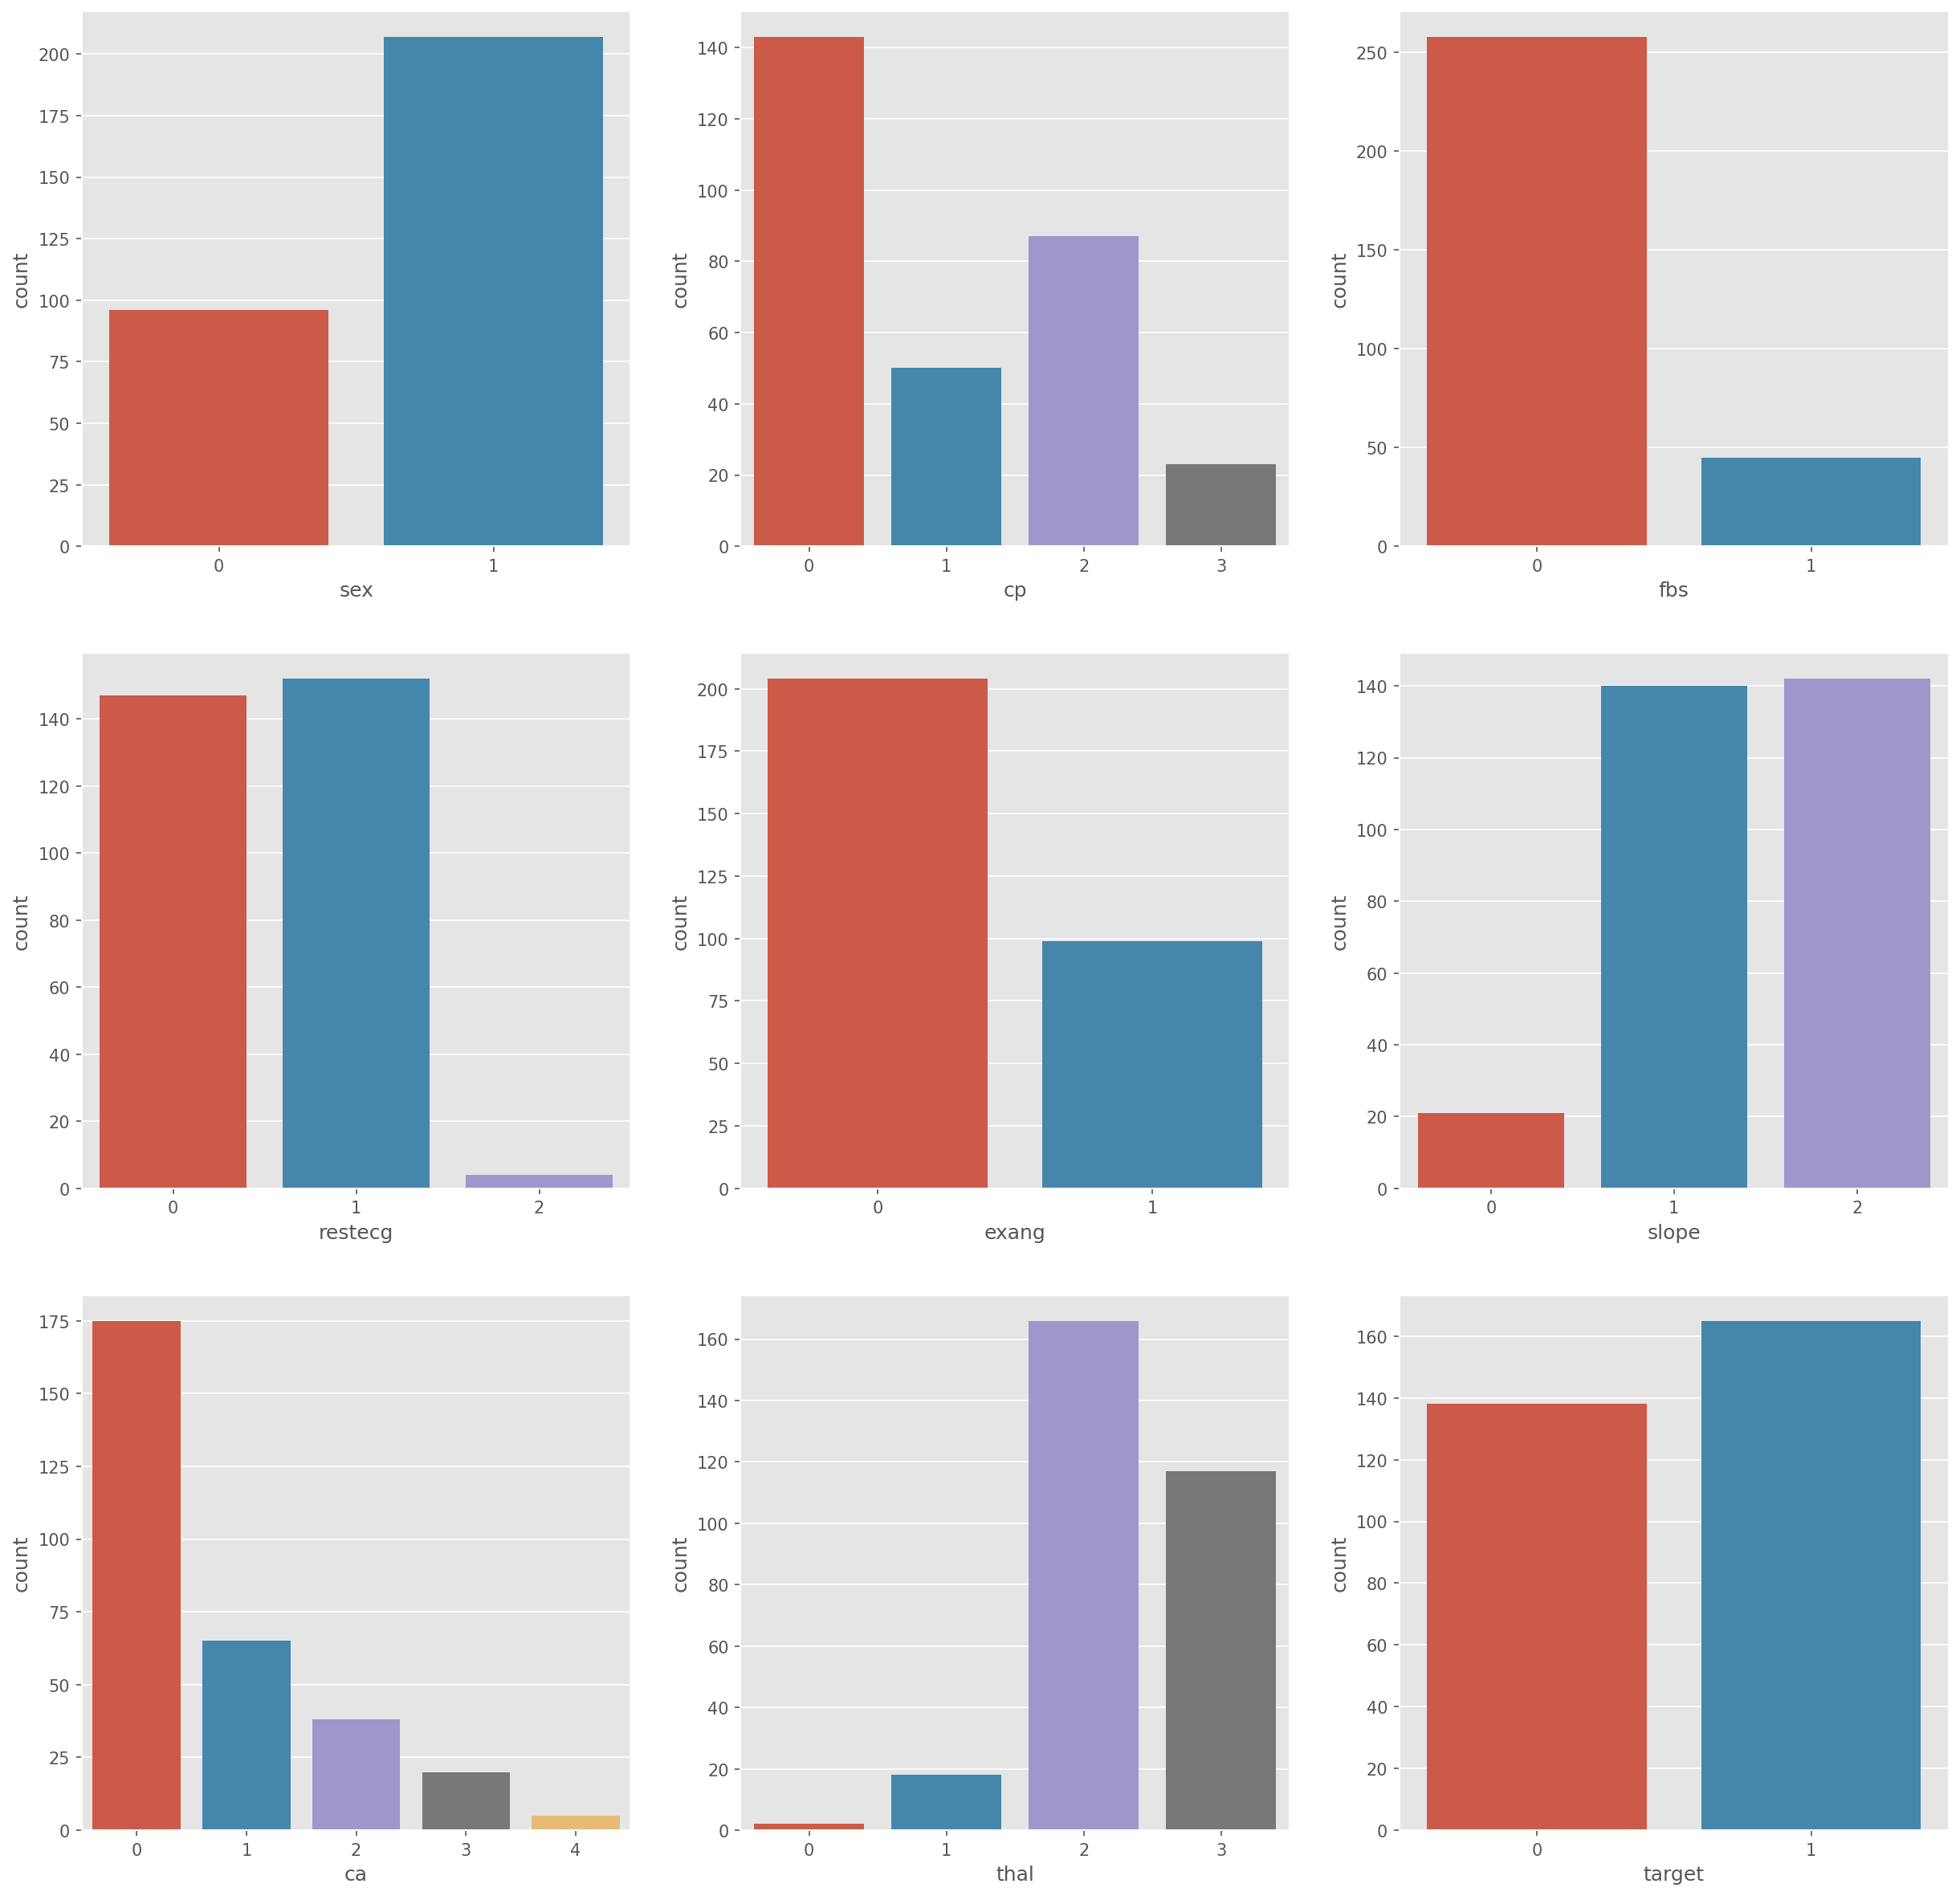

In [25]:
fig,axes=plt.subplots(ncols=3,nrows=3,figsize=(20,20),dpi=150)
sns.countplot(data=df[catcol],x='sex',ax=axes[0,0])
sns.countplot(data=df[catcol],x='cp',ax=axes[0,1])
sns.countplot(data=df[catcol],x='fbs',ax=axes[0,2])
sns.countplot(data=df[catcol],x='restecg',ax=axes[1,0])
sns.countplot(data=df[catcol],x='exang',ax=axes[1,1])
sns.countplot(data=df[catcol],x='slope',ax=axes[1,2])
sns.countplot(data=df[catcol],x='ca',ax=axes[2,0])
sns.countplot(data=df[catcol],x='thal',ax=axes[2,1])
sns.countplot(data=df[catcol],x='target',ax=axes[2,2])
plt.tight_layout;

In [28]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

The data seems to be balanced

# CVD across Age category

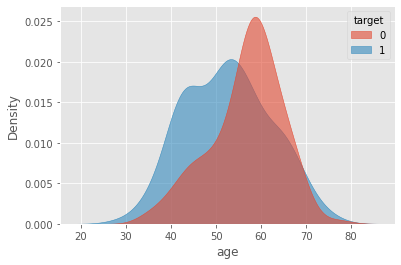

In [27]:
sns.kdeplot(data=df,x='age',hue='target',fill=True,alpha=.6);

The shape and the distribution across age category is quite similar.

# Composition of patients

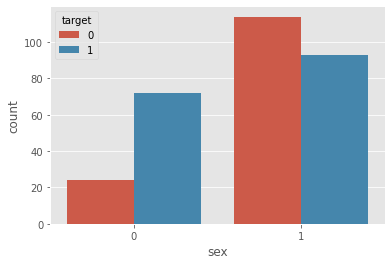

In [29]:
sns.countplot(data=df,x='sex',hue='target');

Male  patients have  higher rate of occurence of heart disease.

# Resting BP Of A Patient

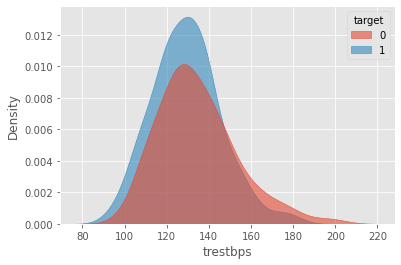

In [30]:
sns.kdeplot(data=df,x='trestbps',hue='target',fill=True,alpha=.6);

The shape and the distribution of the density plot of blood pressure is quite similar, hence it wont be effective in 
heart disease detection

# Relationship Between Cholestrol Levels and Target


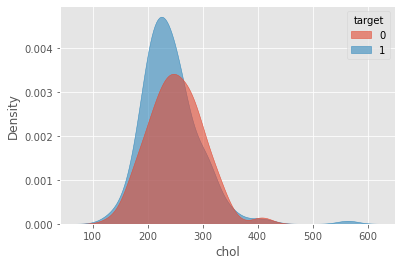

In [31]:
sns.kdeplot(data=df,x='chol',hue='target',fill=True,alpha=.6);

As cholestrol levels reach much higher,the likeliness of the heart disease increases.

# Relation between Peak Exercise and Occurence of heart disease

In [35]:
tab=pd.crosstab(df['slope'],df['target'],normalize='index').round(2)
tab

target     0     1
slope             
0       0.57  0.43
1       0.65  0.35
2       0.25  0.75

occurence of heart disease is more likely when slope value is 2,ie;75% of patients having peak exercise value 2 denoted by slope 
have heart diseases.

# Check if thalassemia is a major cause of CVD

In [37]:
tab=pd.crosstab(df['thal'],df['target'],normalize='index').round(2)
tab

target     0     1
thal              
0       0.50  0.50
1       0.67  0.33
2       0.22  0.78
3       0.76  0.24

76% of patients with thalassemia indicator as 3 have heart disease.

# OTHER FACTORS

In [38]:
tab=pd.crosstab(df['cp'],df['target'],normalize='index').round(2)
tab

target     0     1
cp                
0       0.73  0.27
1       0.18  0.82
2       0.21  0.79
3       0.30  0.70

For patients chest pain type 0 occurence of heart disease is less.For cp type 1,2,3 there are higher chances of having a heart disease

In [39]:
tab=pd.crosstab(df['fbs'],df['target'],normalize='index').round(2)
tab

target     0     1
fbs               
0       0.45  0.55
1       0.49  0.51

 51% of patients with fasting blood sugar greater than 120mg/dl have heart disease

In [41]:
tab=pd.crosstab(df['restecg'],df['target'],normalize='index').round(2)
tab

target      0     1
restecg            
0        0.54  0.46
1        0.37  0.63
2        0.75  0.25

63% of patients with Resting electrocardiographic result as type 1 have heart disease.Less than 50% of patients having result either 0 or 2 have heart disease.

In [42]:
tab=pd.crosstab(df['exang'],df['target'],normalize='index').round(2)
tab

target     0     1
exang             
0       0.30  0.70
1       0.77  0.23

23% of total patients with Exercise induced angina as type 1 have heart disease;hence a patient with exang result as 1 chances of having a heart disease is low.

In [43]:
tab=pd.crosstab(df['ca'],df['target'],normalize='index').round(2)
tab

target     0     1
ca                
0       0.26  0.74
1       0.68  0.32
2       0.82  0.18
3       0.85  0.15
4       0.20  0.80

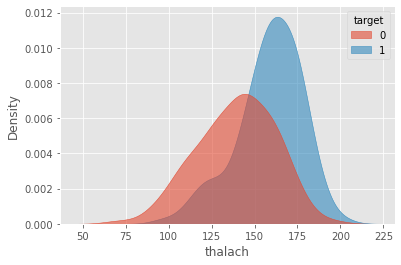

In [44]:
sns.kdeplot(data=df,x='thalach',hue='target',fill=True,alpha=.6);

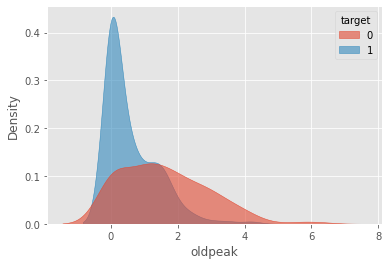

In [45]:
sns.kdeplot(data=df,x='oldpeak',hue='target',fill=True,alpha=.6);

# Pairplot between variables

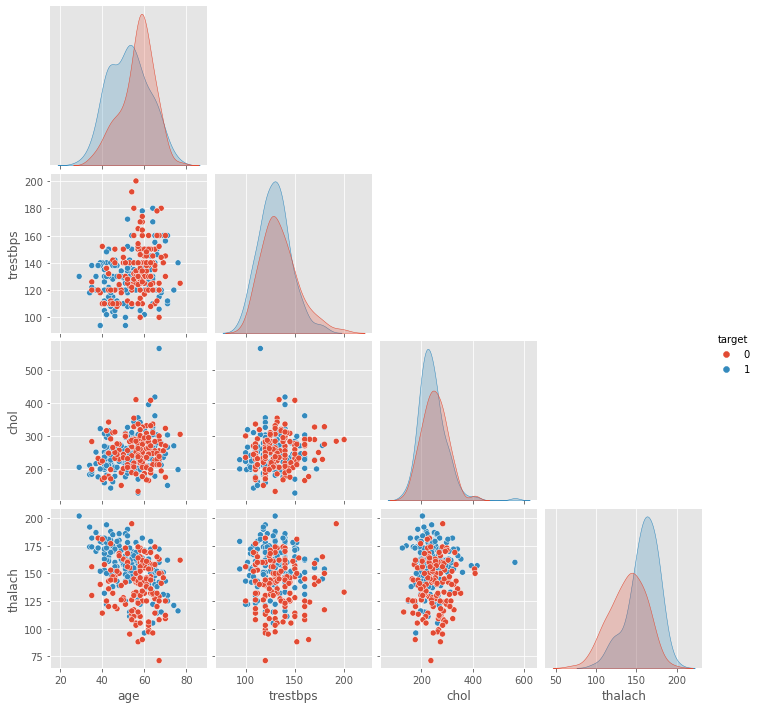

In [48]:

sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target',corner=True);

# Model Prediction

In [53]:
X = df.drop('target',axis=1)
y = df['target']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [56]:
scaler = StandardScaler()


In [57]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegressionCV 

In [59]:
log_model = LogisticRegressionCV()

In [60]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [61]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [62]:
y_pred = log_model.predict(scaled_X_test)

In [63]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


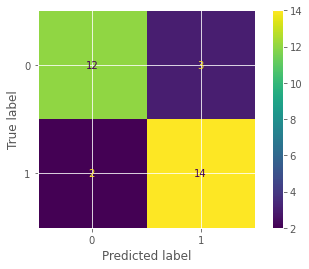

In [64]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model=RandomForestClassifier()

In [68]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
pred=rf_model.predict(X_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


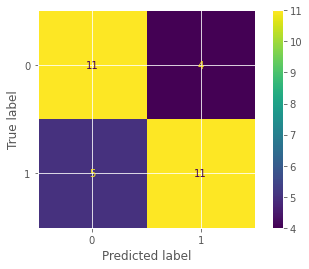

In [77]:
plot_confusion_matrix(rf_model,scaled_X_test,y_test)

In [70]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



In [72]:
from statsmodels.api import OLS

In [73]:
st_model=OLS(y_train,X_train).fit()

In [74]:
st_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.773
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              67.99
Date:                Fri, 20 Jan 2023   Prob (F-statistic):                    1.33e-75
Time:                        13:19:33   Log-Likelihood:                         -102.22
No. Observations:                 272   AIC:                                      230.4
Df Residuals:                     259   BIC:                                      277.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0030      0.002      1.229      0.220      -0.002       0.008
sex           -0.1629      0.049     -3.331      0.001      -0.259      -0.067
cp             0.1232      0.024      5.112      0.000       0.076       0.171
trestbps      -0.0003      0.001     -0.247      0.805      -0.003       0.002
chol          -0.0001      0.000     -0.252      0.801      -0.001       0.001
fbs            0.0139      0.063      0.222      0.824      -0.109       0.137
restecg        0.0475      0.042      1.134      0.258      -0.035       0.130
thalach        0.0047      0.001      4.971      0.000       0.003       0.007
exang         -0.1121      0.054     -2.069      0.040      -0.219      -0.005
oldpeak       -0.0520      0.026     -2.010      0.045      -0.103      -0.001
slope          0.0965      0.046      2.091      0.038       0.006       0.187
ca            -0.1154      0.023     -4.935      0.000      -0.161      -0.069
thal          -0.1126      0.037     -3.006      0.003      -0.186      -0.039
==============================================================================
Omnibus:                        6.655   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.791
Skew:                          -0.386   Prob(JB):                       0.0335
Kurtosis:                       2.933   Cond. No.                         943.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""